# Importing the modules

In [1]:
import itertools
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt

# Loading the data

In [2]:
df=pd.read_csv('./corpus_complet.tsv',delimiter='\t')

In [3]:
df.shape

(1427, 6)

In [4]:
df.head()

,url,title,body,preprocessed body,keywords,authenticity
0,https://www.timesnewroman.ro/life-death/au-inc...,Au început programările la vaccinare. 10 probl...,• Pentru că programările se fac în ordinea alf...,începe programare vaccinare problemă din prima...,"pentru, programările, ordinea, alfabetică, jud...",FAKE
1,https://www.timesnewroman.ro/monden/canibalii-...,Canibalii misogini din Mediaş susţin că locul ...,"Scandal în Mediaș, după ce un respectat caniba...",canibal misogin mediaș susține loc femeie crat...,"scandal, mediaș, după, respectat, canibal, loc...",FAKE
2,https://www.timesnewroman.ro/monden/nea-costel...,Nea Costel lansează un volum de poezie sub pse...,Încurajat de popularitatea neașteptată din ult...,nene costel lansa volum poezie pseudonim bețiv...,"Încurajat, popularitatea, neașteptată, ultima,...",FAKE
3,https://www.timesnewroman.ro/life-death/dumini...,Duminica Verde la Patriarhie. Azi în cutia mil...,BOR se alătură demersulului Ministerului Mediu...,duminică verde patriarhie cutie milă sine pute...,"alătură, demersulului, ministerului, mediului,...",FAKE
4,https://www.timesnewroman.ro/it-stiinta/alerta...,Alertă de vreme severă! Un nor tocmai ne-a pus...,ANM avertizează: urmează vreme severă în toată...,alertă sever nor pune scoate foaie hârtie ANM ...,"avertizează, urmează, vreme, severă, toată, ţa...",FAKE


In [5]:
df.tail()

,url,title,body,preprocessed body,keywords,authenticity
1422,https://www.digi24.ro/stiri/actualitate/65-de-...,65 de morți din cauza coronavirusului în România,Au fost raportate încă 13 decese ale unor pers...,angela Merkel an primi vineri doză vaccin prod...,"suceava,coronavirus,covid-19",TRUE
1423,https://www.digi24.ro/stiri/externe/certificat...,Certificatul de vaccinare cu AstraZeneca al ca...,"Angela Merkel, în vârstă de 66 de ani, a primi...",Ford motor anunța serie închidere fabricilor d...,"Angela Merkel,vaccin astrazeneca,cancelarul ge...",TRUE
1424,https://www.digi24.ro/stiri/sci-tech/auto/ford...,Ford închide temporar șase fabrici din SUA și ...,Ford Motor a anunţat o nouă serie de închideri...,ultim oră caz prezent românia confirmat caz pe...,"ford,pandemie coronavirus,semiconductori,criza...",TRUE
1425,https://www.digi24.ro/stiri/crestere-de-30-a-i...,Creștere de 30% a infectărilor cu coronavirus ...,În ultimele 24 de ore au fost 1.059 de cazuri ...,echipă feminin handbal CSM bucurești rata cali...,"terapie intensiva,coronavirus,coronavirus roma...",TRUE
1426,https://www.digi24.ro/stiri/sport/csm-bucurest...,CSM Bucureşti a ratat dramatic calificarea la ...,Echipa feminină de handbal CSM București a rat...,NaN,"Liga Campionilor,semifinale,CSM Bucureşti,fina...",TRUE


# The distribution of the articles

In [6]:
true_vals = [x for x in df['authenticity'] if x == 'TRUE']
fake_vals = [x for x in df['authenticity'] if x == 'FAKE']

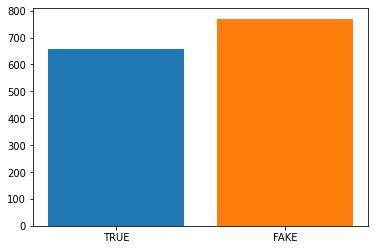

In [7]:
plt.bar(true_vals,len(true_vals))
plt.bar(fake_vals,len(fake_vals))
plt.show()

# Isolating the article labels

In [9]:
labels = df.authenticity
labels.head()

0    FAKE
1    FAKE
2    FAKE
3    FAKE
4    FAKE
Name: authenticity, dtype: object

# Split the dataset

In [10]:
print(df.columns)

Index(['url', 'title', 'body', 'preprocessed body', 'keywords',
       'authenticity'],
      dtype='object')


In [11]:
x_train,x_test,y_train,y_test=train_test_split(df['preprocessed body'].values.astype('str'), labels, test_size=0.2, random_state=7,shuffle=True)

# Initializing a TF IDF matrix 

In [12]:
tfidf_vectorizer=TfidfVectorizer( max_df=0.7)

# Initializing the datasets

In [13]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

# Passive Agressive Classifier

In [14]:
pa_classifier=PassiveAggressiveClassifier(max_iter=50)
pa_classifier.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [15]:
y_pred=pa_classifier.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 95.8%


In [16]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','TRUE'])

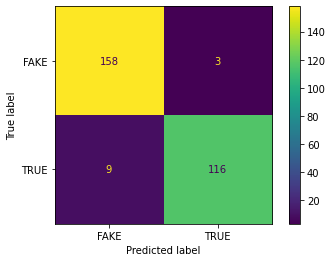

In [17]:
ConfusionMatrixDisplay(cm,display_labels=pa_classifier.classes_).plot()

# Gaussian Naive Bayes 

In [18]:
nb_classifier=GaussianNB()
nb_classifier.fit(tfidf_train.toarray(),y_train)

GaussianNB()

In [19]:
y_pred=nb_classifier.predict(tfidf_test.toarray())
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.66%


In [20]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','TRUE'])

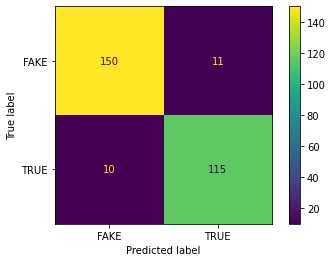

In [21]:
ConfusionMatrixDisplay(cm,display_labels=nb_classifier.classes_).plot()

# Decision trees

In [22]:
tree_classifier=tree.DecisionTreeClassifier()
tree_classifier.fit(tfidf_train.toarray(),y_train)

DecisionTreeClassifier()

In [23]:
y_pred=tree_classifier.predict(tfidf_test.toarray())
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 91.26%


In [24]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','TRUE'])

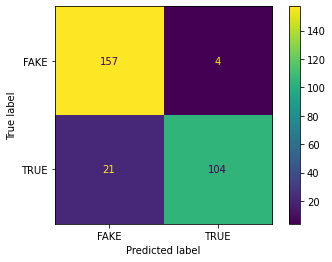

In [25]:
ConfusionMatrixDisplay(cm,display_labels=tree_classifier.classes_).plot()

# Logistic Regression

In [26]:
lr_classifier=PassiveAggressiveClassifier(random_state=0)
lr_classifier.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(random_state=0)

In [27]:
y_pred=lr_classifier.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.15%


In [28]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','TRUE'])

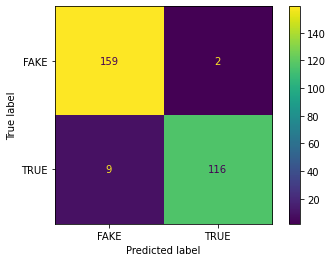

In [29]:
ConfusionMatrixDisplay(cm,display_labels=lr_classifier.classes_).plot()